# 1.5 Analysizing a Monte Carlo or Molecular Dynamics Trajectory. 

Here we would learn to analyze a molecular dynamics trajectory. We would compute:

(1.5.1) Vibrational density along normal modes

(1.5.2) Anharmonic Measure proposed by Carbogno and coworkers.

1.5.1. Vibrational Density along Normal Mode
====
The file co2-b3lyp.pos_0.xyz contains a 10000 step trajectory from a Path-Integral PIGLET simulation. We would discard the first 2000 step (1ps) for equilibration and compute the vibrational density along normal modes. We would use xyz2nmode class of pyepfd.

In [1]:
from pyepfd.xyz2nmode import *

                                                 
          ███████████                            
         ░░███░░░░░███                           
          ░███    ░███ █████ ████                
          ░██████████ ░░███ ░███                 
          ░███░░░░░░   ░███ ░███                 
          ░███         ░███ ░███                 
          █████        ░░███████                 
         ░░░░░          ░░░░░███                 
                        ███ ░███                 
                       ░░██████                  
                        ░░░░░░                   
 ██████████ ███████████  ███████████ ██████████  
░░███░░░░░█░░███░░░░░███░░███░░░░░░█░░███░░░░███ 
 ░███  █ ░  ░███    ░███ ░███   █ ░  ░███   ░░███
 ░██████    ░██████████  ░███████    ░███    ░███
 ░███░░█    ░███░░░░░░   ░███░░░█    ░███    ░███
 ░███ ░   █ ░███         ░███  ░     ░███    ███ 
 ██████████ █████        █████       ██████████  
░░░░░░░░░░ ░░░░░        ░░░░░       ░░░░░░░░░░   


In [2]:
nm_density = prob_dist_on_nm(
            phonon_info_file='../2_normal_mode_phonon/enmfdphonon.xml', #File containing phonon information.
            ref_struc='../1_cartesian_phonon/co2_b3lyp_opt.xyz', #xyz file containing optimized geometry
            traj_file='co2-b3lyp.pos_0.xyz', #trajectory file
            prefix='co2-100K', # The prefix that would be used for outputs
            par_exec = False, #If true then run using mpirun
            nmode_traj = False, #If true a normal mode trajectory would be written
            start_frame = 2001, #First 2000 steps discarded forequilibration
            end_frame = 10000, #Default is the last frame
            mode_list = [6,7,8,9]
            )
## deleting the object to finish the process
del nm_density

Process-id0: Time spent on read_pyepfd_info class: 0.0005273818969726562 s.
Total execution time (s): 1.6892316341400146


This created two files: (1) co2-100K.stat.dat & (2) co2-100K.prob-density.dat. The first file prints some statistics.

In [3]:
%%bash
cat co2-100K.stat.dat

#-----------------------------------------Information-----------------------------------
#        Skewness = Fischer - Pearson coefficient of skewness (moment based)         
#       Skew-Test Null Hypothesis: The distribution is drawn from a Gaussian         
#   Therefore if p-value is less than 0.05 that means the distribution is skewed     
#                      with (1 - 0.05)*100 = 95% confidence                          
#               Mean, Median and Stdev are in Freq scaled coordinate                 
#---------------------------------------------------------------------------------------
# Mode No      Mean          Median          Stdev        Skewness    Skew-Test(p-value)
#---------------------------------------------------------------------------------------
      6      0.0150425      0.0139688       0.697128    -0.00828963       0.761954
      7     0.00316282   -1.45686e-05       0.730729      0.0254228       0.352964
      8      0.0972618      0.0554929       0.72

The second file prints the the probability density of the 7,8 & 9th normal modes.

In [4]:
%%bash
head -n 25 co2-100K.prob-density.dat

#Column-1 => Grid points(Freq Scaled)
#Other columns => probability densities for Modes:6 7 8 9
-4.995  0.0  0.0  0.0  0.0
-4.985  0.0  0.0  0.0  0.0
-4.975  0.0  0.0  0.0  0.0
-4.965  0.0  0.0  0.0  0.0
-4.955  0.0  0.0  0.0  0.0
-4.945  0.0  0.0  0.0  0.0
-4.9350000000000005  0.0  0.0  0.0  0.0
-4.925  0.0  0.0  0.0  0.0
-4.915  0.0  0.0  0.0  0.0
-4.905  0.0  0.0  0.0  0.0
-4.895  0.0  0.0  0.0  0.0
-4.885  0.0  0.0  0.0  0.0
-4.875  0.0  0.0  0.0  0.0
-4.865  0.0  0.0  0.0  0.0
-4.855  0.0  0.0  0.0  0.0
-4.845  0.0  0.0  0.0  0.0
-4.835  0.0  0.0  0.0  0.0
-4.825  0.0  0.0  0.0  0.0
-4.8149999999999995  0.0  0.0  0.0  0.0
-4.805  0.0  0.0  0.0  0.0
-4.795  0.0  0.0  0.0  0.0
-4.785  0.0  0.0  0.0  0.0
-4.775  0.0  0.0  0.0  0.0


This file could be used to plot the probability density using matplotlib. 

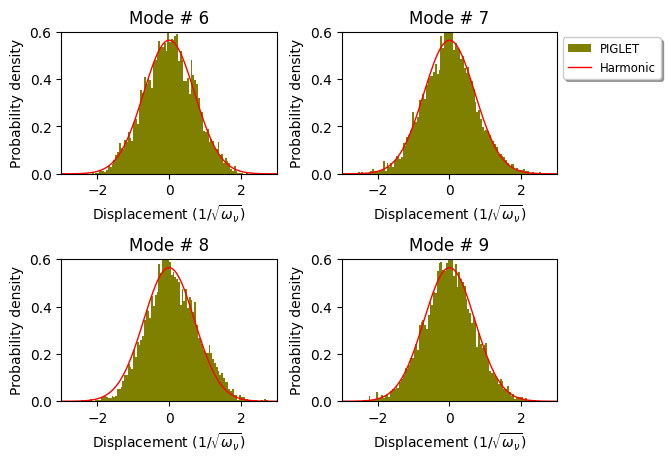

In [5]:
import numpy as np
import matplotlib.pyplot as plt
hist_data = np.genfromtxt('co2-100K.prob-density.dat')
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.6)
plt.setp(axs,xlim=(-3,3),ylim=(0,0.6))
mode_list = [6,7,8,9]
imode=0
bins=np.linspace(-5,5,201) # Histogram bins
#Harmonic density is a Gaussian
harmonic_density = [1/np.sqrt(np.pi)*np.exp(-1.0*x**2) for x in bins]
for plot_row in range(2):
    for plot_col in range(2):
        axs[plot_row,plot_col].set_xlabel("Displacement $(1/\sqrt{\omega_{\\nu}})$")
        axs[plot_row,plot_col].set_ylabel("Probability density")
        axs[plot_row,plot_col].set_title("Mode # " + str(mode_list[imode]))
        axs[plot_row,plot_col].hist(hist_data[:,0], weights=hist_data[:,imode+1], bins=bins, density=True,\
                      histtype= 'stepfilled', color = 'olive', label = 'PIGLET')
        axs[plot_row,plot_col].plot(bins,harmonic_density, linewidth = 1.0, color = 'red', label = "Harmonic")
        if imode==1:
           axs[plot_row,plot_col].legend(loc='best',bbox_to_anchor=(1,1),shadow=True, fontsize='small')
        imode += 1
plt.show()              

1.5.2. Calculation of Anharmonic Measure
===
Now we will calculate the anharmonic measure as proposed by Carbogno and co-workers, see https://journals.aps.org/prmaterials/abstract/10.1103/PhysRevMaterials.4.083809. For that purpose we need to import anharm module available within pyEPFD. We need a trajectory including the forces. Files co2-1.r and co2-2.r contains forces, Kohn-sham eigenvalues etc. for the PIGLET trajectory sampled every 5-th step after discarding 2000 steps for equilibration.   

In [6]:
from pyepfd.anharm import anharm_measure
#We need qbox class to read qbox outputs 
from pyepfd.coord_util import qbox
#We need pyepfd_io module to parse and store restart file
from pyepfd.pyepfd_io import *

### qbout a list of objects each of which stores qbox output information
qbout = [] # initialize it with a empty list
##

# Initiating the qbout objects from co2-1.r and co2-2.r
for i in range(2):
    qbout.append( qbox(file_path='co2-'+str(i+1)+'.r', io = 'r') )

## Concatenating coordinates and forces into a single array
for i in range(len(qbout)):
    if i == 0:
       coords = qbout[i].coords
       forces = qbout[i].forces
    else:
       coords = np.vstack((coords, qbout[i].coords))
       forces = np.vstack((forces, qbout[i].forces))

### Now we read the normal mode information from the restart file
phonon_info = read_pyepfd_info(file_path='../2_normal_mode_phonon/enmfdphonon.xml')

## Now we calculate anharm measure
anharm = anharm_measure(dynmat = phonon_info.ref_dynmatrix, \
                        mass = phonon_info.mass, \
                        forces = forces, \
                        disp_coords = coords, \
                        opt_coord = phonon_info.coord, \
                        remove_rot_trans = True,\
                        asr = phonon_info.asr)

# We write the informations using write method in anharm object.
anharm.write(file_path='co2-100K-piglet',atoms=phonon_info.atoms)

# Task complete, we are deleting the anharm object to finish file writing
del anharm

Time spent on qbox class: 0.16231036186218262 s.
Time spent on qbox class: 0.1451880931854248 s.
Process-id0: Time spent on read_pyepfd_info class: 0.00029730796813964844 s.
anharm_measure: Execution time (s): 0.32349658012390137


This will create two files storing the mode-resolved and atom resolved anharmonic measures.

Let us first look at the mode-resolved measure.

In [7]:
%%bash
cat co2-100K-piglet_mode_res_anh_mes.out

# Mode  Freq(cm-1)       Var(Anh)        Var(Tot)     Anh_Measure 
#--------------------------------------------------------------
    1     -0.0000    5.97692e-06     6.12601e-06       0.987757 
    2     -0.0000    6.31072e-06     1.97373e-06        1.78812 
    3     -0.0000    0.000206224     8.77498e-06        4.84782 
    4      0.0000    6.15809e-06     6.91862e-06       0.943438 
    5      0.0000    6.09401e-06     5.90723e-05       0.321188 
    6    681.8844    0.000174674     0.000346854       0.709644 
    7    681.8851    6.19722e-06     0.000368153       0.129743 
    8   1345.3420    5.64072e-06      0.00337331      0.0408921 
    9   2367.9766    0.000259688       0.0141033       0.135695 
#--------------------------------------------------------------
# SUM                7.52182e-05      0.0020305       0.192469


We can neglect the first 5-modes (translation & rotation). Now 6th and 7-th modes are degenerate in-plane and out-of-plane bending. Being degenerate, any linear-combination of the obtaned eigenvectors is also a possible description of these normal modes and therefore, there anharmonic measure should not be reported separately but the average anharmonic measure of such Eg modes must be reported. 

The anharmonic measure is the square-root of the ratio of the varience of anharmonic forces (column 3) and the varience of total force (column 4). Therefore, the average anharmonic measure of the Eg modes can be calculated as shown below.

In [8]:
import numpy as np
# Now we read force variences (columns 3 & 4) from the above file
f_var = np.genfromtxt("co2-100K-piglet_mode_res_anh_mes.out", usecols=(2,3)) 
anh_mes = np.sqrt( (f_var[5,0] + f_var[6,0]) / (f_var[5,1] + f_var[6,1]) )
print("Anharmonic Measure of Bending Modes = " + str(anh_mes) )

Anharmonic Measure of Bending Modes = 0.5029555295307137


Similarly we can also check the anharmonic measure of each atom separately.

In [9]:
%%bash
cat co2-100K-piglet_atom_res_anh_mes.out

#  Atom         Var(Anh)        Var(Tot)     Anh_Measure 
#--------------------------------------------------------
    1   O     7.28372e-05      0.0014313       0.225586
    2   O     6.23086e-05     0.00135273       0.214619
    3   C     9.05087e-05     0.00330748       0.165423
#-------------------------------------------------------
# SUM         7.52182e-05      0.0020305       0.192469


If we want to obtain average anharmonic measure of a group of atoms, e.g., O atoms in CO2 we can compute the average anharmonic measure just we did it for bending modes.

In [10]:
import numpy as np
# Now we read force variences (columns 3 & 4) from the above file
f_var = np.genfromtxt("co2-100K-piglet_atom_res_anh_mes.out", usecols=(2,3)) 
anh_mes = np.sqrt( (f_var[0,0] + f_var[1,0]) / (f_var[0,1] + f_var[1,1]) )
print("Anharmonic Measure O atoms = " + str(anh_mes) )

Anharmonic Measure O atoms = 0.22032527522933562
